In [5]:
#importando a biblioteca pandas
import pandas as pd
import numpy as np
#importando o arquivo do colab
from google.colab import files
uploaded = files.upload()



Saving train.csv to train (1).csv


**Abrindo o arquivo e visualização do que eu vou enfrentar**


In [6]:
#Criando o dataframe com pandas
df = pd.read_csv("train.csv")
#olhando os 5 primeiros dados do dataset --->df.head
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#Uma visão geral do meu dataset
#Descobrimos que há 891 instânias e 12 colunas(atributos)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#Fazendo um resumo dos dados
df.describe()
#Já descobrimos que a idade média dos passageiros do titanic era 29 anos e que o passageiro mais novo tinha 0.4 anos(5 meses) e a idade máxima era 80 anos


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Análise exploratória dos dados**


In [9]:
#Contando quantos homens e quantas mulheres tinham no navio
df["Sex"].value_counts()
#descobrimos que tinham 577 homens e 314 mulheres

male      577
female    314
Name: Sex, dtype: int64

In [10]:
#importando o método para fazer gráficos
import matplotlib.pyplot as plt
#separando um dataset de homens e outro de mulheres
homens = df[df.Sex == 'male']
mulheres = df[df.Sex == 'female']
criancas = df[df.Age <16] 


In [11]:
homens.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,577.000000,577.000000,577.000000,453.000000,577.000000,577.000000,577.000000
mean,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893
std,257.486139,0.391775,0.813580,14.678201,1.061811,0.612294,43.138263
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,464.000000,0.000000,3.000000,29.000000,0.000000,0.000000,10.500000
75%,680.000000,0.000000,3.000000,39.000000,0.000000,0.000000,26.550000
max,891.000000,1.000000,3.000000,80.000000,8.000000,5.000000,512.329200


In [12]:
mulheres.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,314.000000,314.000000,314.000000,261.000000,314.000000,314.000000,314.000000
mean,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
std,256.846324,0.438211,0.857290,14.110146,1.156520,1.022846,57.997698
min,2.000000,0.000000,1.000000,0.750000,0.000000,0.000000,6.750000
25%,231.750000,0.000000,1.000000,18.000000,0.000000,0.000000,12.071875
50%,414.500000,1.000000,2.000000,27.000000,0.000000,0.000000,23.000000
75%,641.250000,1.000000,3.000000,37.000000,1.000000,1.000000,55.000000
max,889.000000,1.000000,3.000000,63.000000,8.000000,6.000000,512.329200


In [13]:
criancas.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,431.602410,0.590361,2.626506,6.369518,1.734940,1.265060,32.785795
std,287.079319,0.494757,0.619024,4.729063,1.638592,0.682255,33.466438
min,8.000000,0.000000,1.000000,0.420000,0.000000,0.000000,7.225000
25%,172.500000,0.000000,2.000000,2.000000,0.000000,1.000000,15.900000
50%,436.000000,1.000000,3.000000,5.000000,1.000000,1.000000,26.250000
75%,706.500000,1.000000,3.000000,9.500000,3.000000,2.000000,32.193750
max,876.000000,1.000000,3.000000,15.000000,5.000000,2.000000,211.337500


**Avaliando o dataset de homens, mulheres e crianças**


No navio tinha 83 crianças de ambos os sexos. Se dividiros todos os habitantes do navio, há 314 mulheres e 377 homens. Das 83 rianças, 75% delas tem até 9 anos de idade.


In [14]:
#Contando quantos homens sobreviveram
#1 significa que sobreviveu e 0 significa que morreu
homens['Survived'].value_counts()

0    468
1    109
Name: Survived, dtype: int64

In [15]:
#Contando as mulheres que sobreviveram
mulheres['Survived'].value_counts()

1    233
0     81
Name: Survived, dtype: int64

In [16]:
#Contando as crianças que sobreviveram
criancas['Survived'].value_counts()

1    49
0    34
Name: Survived, dtype: int64

In [17]:
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


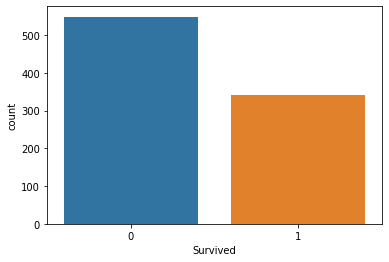

In [18]:
#plotando os gráficos
#Não consegui alterar os dados do gráfico até aqui
sns.countplot('Survived', data=df)

In [19]:
#Tentando outra forma, agora com o dataset de homens
#Como os valores são de 0 e 1, podemos utilizar o replace para subsitituir o zero para morreu e o um para sobreviveu
#Lembrar de colocar inplace = True. Não sei pq, mas só funcionou assim.

homens['Survived'].replace(to_replace=0,value = "Não", inplace= True)
homens['Survived'].replace(to_replace=1,value = "Sim", inplace= True)


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


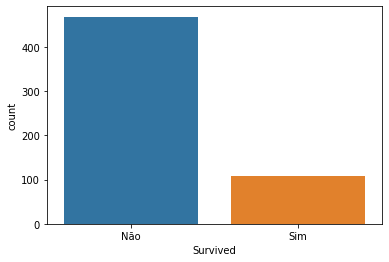

In [20]:
#Plotando o gráfico para homens
#Uma dica: Fazer os ajustes em blocos diferentes e plotar o gráfico depois
sns.countplot('Survived',data=homens)

In [21]:
#Ajustando os dados para mulheres.
mulheres['Survived'].replace(0,value = "Não", inplace=True)
mulheres['Survived'].replace(1, value = "Sim", inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


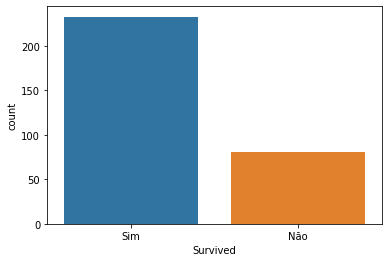

In [22]:
sns.countplot("Survived", data=mulheres)

In [23]:
#Crianças.
criancas['Survived'].replace(0,value="Não", inplace= True)
criancas['Survived'].replace(1,value="Sim", inplace= True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


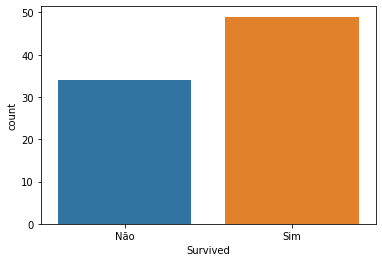

In [24]:
sns.countplot("Survived", data=criancas)

**Analisando por classes**

In [25]:
df['Pclass'].describe()

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

In [26]:
df['Pclass'].value_counts()
#descobrimos que tinham 216 na primeira classe, 184 na segunda classe e 491 na terceira classe


3    491
1    216
2    184
Name: Pclass, dtype: int64

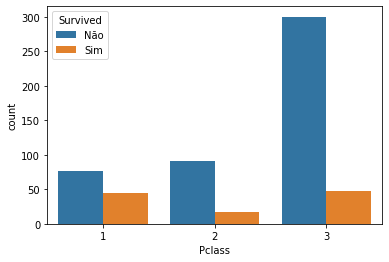

In [27]:
#Dos homens, avaliando quantos morreram por classe
phomem = sns.countplot(x=homens['Pclass'], hue=homens['Survived'])


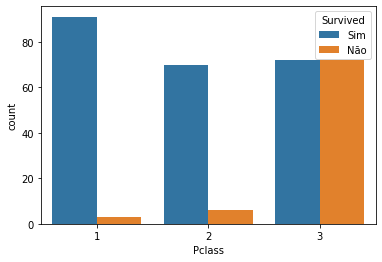

In [28]:
#Das mulheres, avaliando quantas morreram por classe
pmulher = sns.countplot(x=mulheres['Pclass'], hue= mulheres['Survived'])

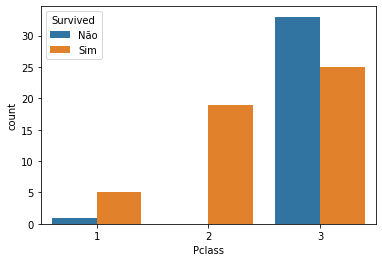

In [29]:
#Das crianças, avaliandoquantas morreram por classe
pcriancas = sns.countplot(criancas['Pclass'], hue = criancas['Survived'])

In [30]:
#Dúvida, vou contar aqui quantas crianças tinham por classe
criancas['Pclass'].value_counts()

3    58
2    19
1     6
Name: Pclass, dtype: int64

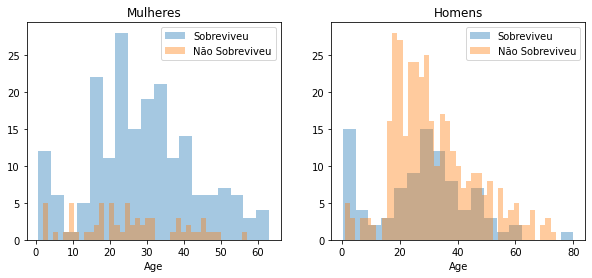

In [55]:
#Novas análises do Titanic
#Aprendendo a fazer graficos
Sobreviveu = "Sobreviveu"
N_Sobreviveu = "Não Sobreviveu"
#Criando o gráfico
#nrows e ncols definem o número de colunas e linhas da figura
#nrows e ncols dão uma noção de quantos gráficos terão na figura
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
#Separando os dataframes de homens e mulheres
mulher_1 = df[df['Sex'] == 'female']
homem_1 = df[df['Sex']== 'male']
#Fazendo a distribuição, bins é o número de pequenas colunas. Notar que o sobreviveu é mais largo e tem menos quantidade que o não sobreviveu
ax = sns.distplot(mulher_1[mulher_1['Survived']==1].Age.dropna(),
bins=18,label= Sobreviveu,ax = axes[0], kde=False)
ax = sns.distplot(mulher_1[mulher_1['Survived']==0].Age.dropna(),
bins=40,label= N_Sobreviveu,ax= axes[0], kde=False)
#ax.legend dá a legenda ao gráfico
ax.legend()
#ax.set_title dá um título ao gráfico
ax.set_title('Mulheres')
#Agora é a vez de fazer o gráfico para homens. A diferença é que axes = 1
ax = sns.distplot(homem_1[homem_1['Survived']==1].Age.dropna(),
bins=18,label= Sobreviveu,ax= axes[1], kde=False)
ax = sns.distplot(homem_1[homem_1['Survived']==0].Age.dropna(),
bins=40,label= N_Sobreviveu,ax= axes[1], kde=False)
ax.legend()
_=ax.set_title('Homens')



In [58]:
#Contando a quantidade de nulos
df.isna().sum()
#Percebemos que idade e cabine são os que possuem mais dados nulos

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#Convertendo os dados não numéricos em numéricos
